### Assignment – 771762_B22_T3A: Big Data and Data Mining PROJECT

## Necessary Libraries Imported 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Data Preprocessing

### Connect to the Database

In [2]:
con = sqlite3.connect("accident_data_2023.db")
cursor = con.cursor()

In [3]:
cursor.execute("PRAGMA table_info(accident)")
col_info = cursor.fetchall()
col_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [4]:
cursor.execute("PRAGMA table_info(vehicle)")
col_info = cursor.fetchall()
col_info

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [5]:
# Get the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = cursor.fetchall()

In [6]:
# Retrieve column names for each table and store them in separate lists
column_lists = []
for table in table_names:
    cursor.execute(f"PRAGMA table_info({table[0]})")
    col_info = cursor.fetchall()
    column_names = [col[1] for col in col_info]
    column_lists.append(column_names)

In [7]:
# Print the column names for each table
for i, table in enumerate(table_names):
    print(f"Table: {table[0]}")
    print(column_lists[i])
    print()

Table: accident
['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']

Table: casualty
['casualty_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_

### Creating Pandas DataFrame for all Tables

In [8]:
# Query the accident table for the 2020 data
query1 = "SELECT * FROM accident WHERE accident_year = 2020"
df_2020 = pd.read_sql_query(query1, con)
df_2020

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [9]:
df_2020['lsoa_of_accident_location'].unique()

array(['E01004576', 'E01003034', 'E01004726', ..., 'W01000465',
       'W01000466', 'W01000481'], dtype=object)

In [10]:
(df_2020[df_2020['lsoa_of_accident_location'] == '-1'])

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25520,2020052002442,2020,052002442,NaN,NaN,NaN,NaN,5,2,2,...,0,1,1,1,0,0,3,1,2,-1
29452,2020070769852,2020,070769852,NaN,NaN,NaN,NaN,7,3,2,...,0,1,1,1,0,0,3,1,2,-1
32689,2020122001194,2020,122001194,NaN,NaN,NaN,NaN,12,3,2,...,0,1,2,2,0,0,3,1,2,-1
33578,2020137330369,2020,137330369,NaN,NaN,NaN,NaN,13,3,2,...,0,1,1,1,0,0,3,1,1,-1
78198,2020500966926,2020,500966926,243533.0,58802.0,-4.203369,50.408188,50,3,2,...,0,1,1,1,0,0,2,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [11]:
df_2020['road_surface_conditions'].unique()

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [12]:
(df_2020[df_2020['road_surface_conditions'] == -1])

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21032,2020030937290,2020,030937290,297437.0,517966.0,-3.587037,54.546529,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019280
21039,2020030939493,2020,030939493,299302.0,516864.0,-3.557841,54.537004,3,3,1,...,0,1,9,-1,0,0,1,2,2,E01019284
21042,2020030939726,2020,030939726,302614.0,525794.0,-3.509635,54.617876,3,3,2,...,0,1,9,-1,0,0,2,2,1,E01019101
21115,2020030951750,2020,030951750,300076.0,510597.0,-3.543758,54.480859,3,2,1,...,0,1,9,-1,0,0,2,2,2,E01019275
21134,2020030954846,2020,030954846,343036.0,553924.0,-2.889300,54.876823,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86642,202063A017520,2020,63A017520,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,-1,0,0,3,2,-1,-1
86774,202063A056020,2020,63A056020,244350.0,200870.0,-4.252999,51.684963,63,3,2,...,0,7,9,-1,0,0,2,2,-1,W01000711
87047,202063C034620,2020,63C034620,196200.0,236630.0,-4.969711,51.990646,63,3,2,...,0,1,9,-1,0,0,2,2,-1,W01000565
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.642790,99,3,2,...,-1,4,8,-1,-1,-1,1,2,-1,-1


### Data Cleaning

In [13]:
df_2020['weather_conditions'].unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

In [14]:
(df_2020[df_2020['weather_conditions'] == -1])

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,-1,-1,-1,-1,-1,-1,2,-1,2,E01029085


In [15]:
# Drop rows with negative values in 'weather_conditions' and replace -1 with 'Unknown' in 'road_surface_conditions'
df_dropped = df_2020.drop(df_2020[(df_2020['weather_conditions'] < 0)].index)
df_dropped['road_surface_conditions'] = df_dropped['road_surface_conditions'].replace(-1, 'Unknown')

In [16]:
#verify if row drop successful 
(df_dropped[df_dropped['weather_conditions'] == -1])

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


In [17]:
#verify if relacement successful 
(df_dropped[df_dropped['road_surface_conditions'] == -1])

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


### Check fo Null Values 

In [18]:
df_dropped.isnull().any()

accident_index                                 False
accident_year                                  False
accident_reference                             False
location_easting_osgr                           True
location_northing_osgr                          True
longitude                                       True
latitude                                        True
police_force                                   False
accident_severity                              False
number_of_vehicles                             False
number_of_casualties                           False
date                                           False
day_of_week                                    False
time                                           False
local_authority_district                       False
local_authority_ons_district                   False
local_authority_highway                        False
first_road_class                               False
first_road_number                             

In [19]:
df_dropped.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [20]:
# Impute Mean into all rows with Null Values
df_2020_cleaned = df_dropped.fillna(df_dropped.mean())

In [21]:
# Verify if successful 
df_2020_cleaned.isnull().any()

accident_index                                 False
accident_year                                  False
accident_reference                             False
location_easting_osgr                          False
location_northing_osgr                         False
longitude                                      False
latitude                                       False
police_force                                   False
accident_severity                              False
number_of_vehicles                             False
number_of_casualties                           False
date                                           False
day_of_week                                    False
time                                           False
local_authority_district                       False
local_authority_ons_district                   False
local_authority_highway                        False
first_road_class                               False
first_road_number                             

In [22]:
df_2020_cleaned

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [23]:
# Query the vehicle table for the 2020 data
query2 = "SELECT * FROM vehicle WHERE accident_year = 2020"
df2_2020 = pd.read_sql_query(query2, con)
df2_2020

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [24]:
df2_2020.isnull().any()

vehicle_index                       False
accident_index                      False
accident_year                       False
accident_reference                  False
vehicle_reference                   False
vehicle_type                        False
towing_and_articulation             False
vehicle_manoeuvre                   False
vehicle_direction_from              False
vehicle_direction_to                False
vehicle_location_restricted_lane    False
junction_location                   False
skidding_and_overturning            False
hit_object_in_carriageway           False
vehicle_leaving_carriageway         False
hit_object_off_carriageway          False
first_point_of_impact               False
vehicle_left_hand_drive             False
journey_purpose_of_driver           False
sex_of_driver                       False
age_of_driver                       False
age_band_of_driver                  False
engine_capacity_cc                  False
propulsion_code                   

In [25]:
# Query the casualty table for the 2020 data
query3 = "SELECT * FROM casualty WHERE accident_year = 2020"
df3_2020 = pd.read_sql_query(query3, con)
df3_2020

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [26]:
df3_2020.isnull().any()

casualty_index                        False
accident_index                        False
accident_year                         False
accident_reference                    False
vehicle_reference                     False
casualty_reference                    False
casualty_class                        False
sex_of_casualty                       False
age_of_casualty                       False
age_band_of_casualty                  False
casualty_severity                     False
pedestrian_location                   False
pedestrian_movement                   False
car_passenger                         False
bus_or_coach_passenger                False
pedestrian_road_maintenance_worker    False
casualty_type                         False
casualty_home_area_type               False
casualty_imd_decile                   False
dtype: bool

### Data Analysis

In [27]:
number_of_accidents = """SELECT COUNT(*) AS total_accidents
                        FROM accident
                        WHERE accident_year = 2020;
                        """
# Execute the query and load the result into a Pandas DataFrame
number_of_accidents_result = pd.read_sql_query(number_of_accidents, con)
number_of_accidents_result

,total_accidents
0,91199


### Accident Distribution by Day of Week

In [28]:
# Define the SQL query to retrieve accident counts for each day of the week in 2020
significant_days_query = """
SELECT day_of_week,
       COUNT(*) AS accident_count
FROM accident
WHERE accident_year = 2020
GROUP BY day_of_week
ORDER BY day_of_week;
"""
# Execute the query and load the result into a Pandas DataFrame
result_df = pd.read_sql_query(significant_days_query, con)
result_df

,day_of_week,accident_count
0,1,10315
1,2,12772
2,3,13267
3,4,13564
4,5,14056
5,6,14889
6,7,12336


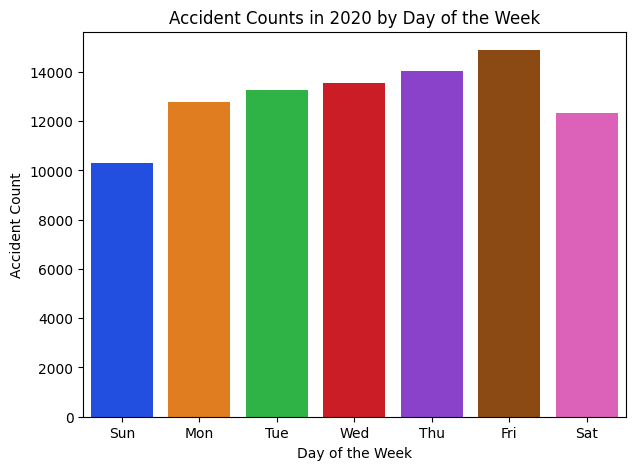

In [29]:
# Define the names for the days of the week
day_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Plot the bar plot with Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=day_names, y='accident_count', data=result_df, palette='bright')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accident Counts in 2020 by Day of the Week')
plt.show()

### Accident Distribution by Day of Week and Hours of Day

In [30]:
significant_hours = """
SELECT strftime('%H', time) AS hour_of_day, 
       COUNT(*) AS accident_count
FROM accident
WHERE accident_year = 2020
GROUP BY hour_of_day
ORDER BY hour_of_day;
"""

result1 = pd.read_sql_query(significant_hours, con)
result1

,hour_of_day,accident_count
0,00,1188
1,01,915
2,02,658
3,03,566
4,04,508
5,05,855
6,06,1830
7,07,3736
8,08,5267
9,09,3917


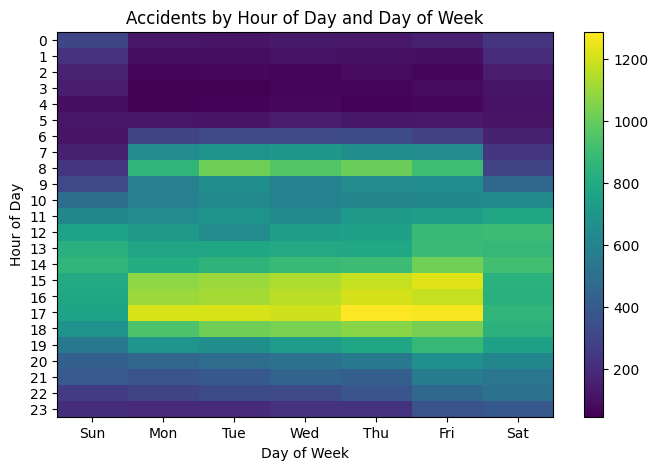

In [31]:
# Convert the 'time' column to datetime format
df_2020['time'] = pd.to_datetime(df_2020['time'])

# Extract the hour of the day and day of the week from the 'time' column
df_2020['hour_of_day'] = df_2020['time'].dt.hour

# Group the data by 'hour_of_day' and 'day_of_week' and count the number of accidents in each group
accident_counts = df_2020.groupby(['hour_of_day', 'day_of_week'])['accident_index'].count().reset_index()

# Plot the data using a heatmap
pivot_table = accident_counts.pivot('hour_of_day', 'day_of_week', 'accident_index')
plt.figure(figsize=(8, 5))
plt.title('Accidents by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.yticks(range(24))
plt.imshow(pivot_table, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

### Accident Distribution by Day of week for Motorbikes

In [32]:
# Query for significant days of the week for motorcycle accidents
query_motorcycle_days = """
    SELECT day_of_week, COUNT(*) AS accident_count
    FROM accident
    JOIN vehicle ON accident.accident_index = vehicle.accident_index
    WHERE vehicle_type IN (3, 4, 5) AND accident.accident_year = 2020
    GROUP BY day_of_week
    ORDER BY day_of_week;
"""
result_motorcycle= pd.read_sql_query(query_motorcycle_days, con)
result_motorcycle

,day_of_week,accident_count
0,1,1738
1,2,1703
2,3,1765
3,4,1841
4,5,2002
5,6,2119
6,7,1830


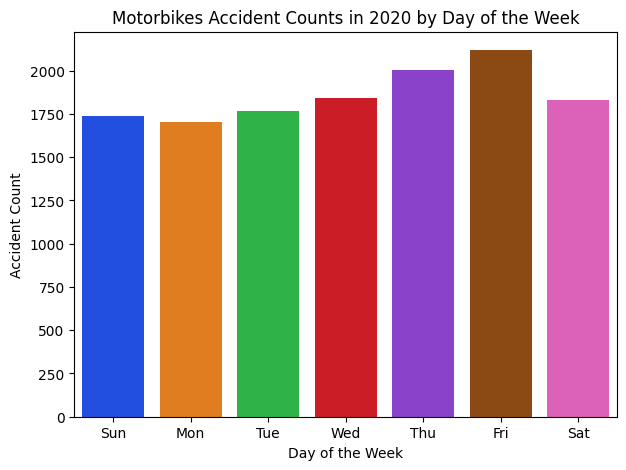

In [33]:
# Plot the bar plot with Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=day_names, y='accident_count', data=result_motorcycle, palette='bright')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Motorbikes Accident Counts in 2020 by Day of the Week')
plt.show()

In [34]:
# Calculate the total number of accidents for the year 2020
total_accidents = number_of_accidents_result['total_accidents'].values[0]

# Calculate the percentage of motorcycle accidents per day of the week
result_motorcycle['percentage_motorcycle'] = (result_motorcycle['accident_count'] / total_accidents) * 100

# Display the result
result_motorcycle

,day_of_week,accident_count,percentage_motorcycle
0,1,1738,1.905723
1,2,1703,1.867345
2,3,1765,1.935328
3,4,1841,2.018662
4,5,2002,2.195200
5,6,2119,2.323490
6,7,1830,2.006601


### Accident Distribution by Hours of Day for Motorbikes

In [35]:
# Query for significant hours of the day and days of the week for motorcycle accidents
query_motorcycle_hours = """
    SELECT strftime('%H', time) AS hour_of_day, COUNT(*) AS accident_count
    FROM accident
    JOIN vehicle ON accident.accident_index = vehicle.accident_index
    WHERE vehicle_type IN (3, 4, 5) AND accident.accident_year = 2020
    GROUP BY hour_of_day
    ORDER BY hour_of_day;
"""
result_motorcycle_hours = pd.read_sql_query(query_motorcycle_hours, con)
result_motorcycle_hours

,hour_of_day,accident_count
0,00,96
1,01,90
2,02,43
3,03,37
4,04,41
5,05,111
6,06,243
7,07,531
8,08,445
9,09,388


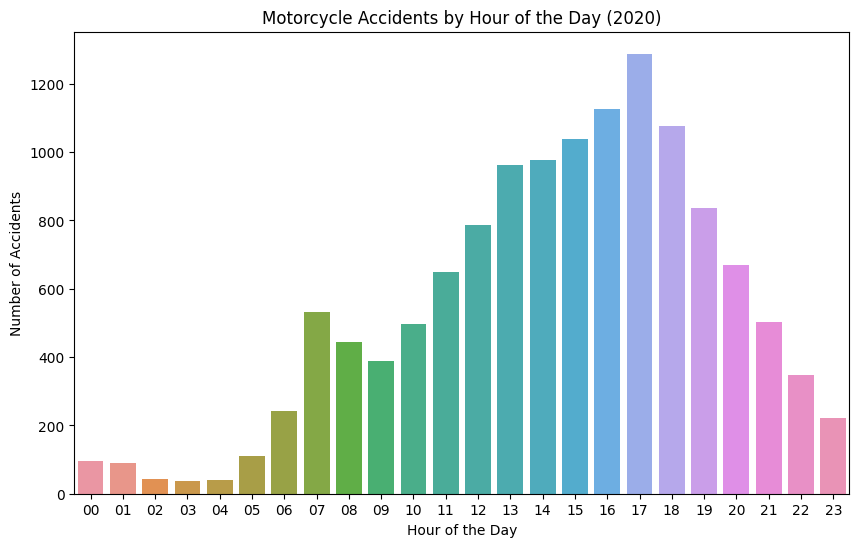

In [36]:
# Plot the motorcycle accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x='hour_of_day', y='accident_count', data=result_motorcycle_hours)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Motorcycle Accidents by Hour of the Day (2020)')
plt.show()

### Pedestrian Accident Distribution by Hours of Day 

In [37]:
# Query for significant hours of the day for pedestrian accidents
query_pedestrian_hours = """
    SELECT strftime('%H', time) AS hour_of_day, COUNT(*) AS pedestrian_count
    FROM accident
    JOIN casualty ON accident.accident_index = casualty.accident_index
    WHERE casualty_class = 3 AND accident.accident_year = 2020
    GROUP BY hour_of_day 
    ORDER BY hour_of_day;
"""
result_pedestrian_hours = pd.read_sql_query(query_pedestrian_hours, con)

# Display the result
result_pedestrian_hours


,hour_of_day,pedestrian_count
0,00,173
1,01,144
2,02,83
3,03,82
4,04,50
5,05,74
6,06,173
7,07,514
8,08,1060
9,09,607


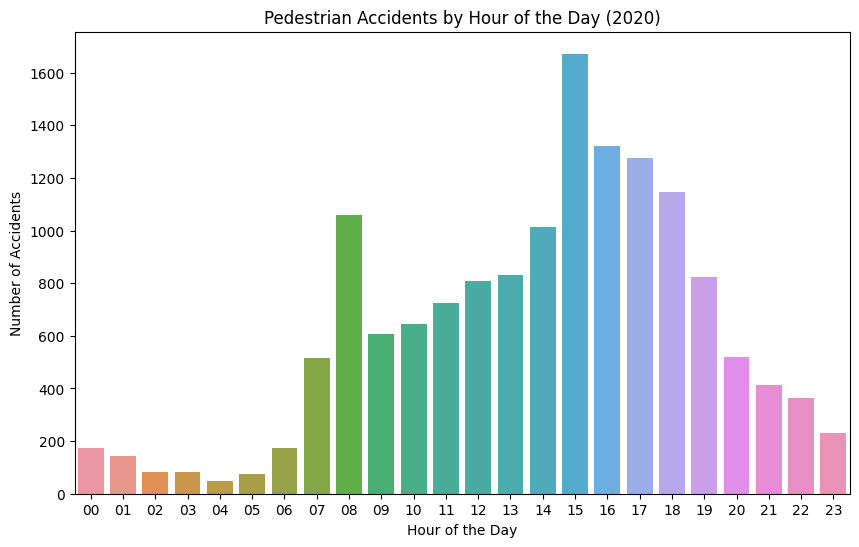

In [38]:
# Plot the motorcycle accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x='hour_of_day', y='pedestrian_count', data=result_pedestrian_hours)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Pedestrian Accidents by Hour of the Day (2020)')
plt.show()

### Pedestrian Accident Distribution by Days of week

In [39]:
# Query for significant days of the week for pedestrians involved in accidents
query_pedestrian_days = """
    SELECT day_of_week, COUNT(*) AS pedestrian_count
    FROM accident
    JOIN casualty ON accident.accident_index = casualty.accident_index
    WHERE casualty_class = 3 AND accident.accident_year = 2020
    GROUP BY day_of_week
    ORDER BY day_of_week;
"""
result_pedestrian_days = pd.read_sql_query(query_pedestrian_days, con)

# Display the result
result_pedestrian_days

,day_of_week,pedestrian_count
0,1,1242
1,2,2207
2,3,2267
3,4,2247
4,5,2366
5,6,2543
6,7,1878


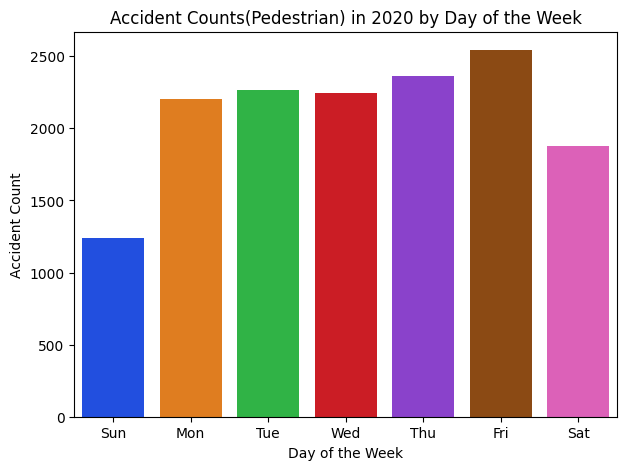

In [40]:
# Plot the bar plot with Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=day_names, y='pedestrian_count', data=result_pedestrian_days, palette='bright')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accident Counts(Pedestrian) in 2020 by Day of the Week')
plt.show()

In [41]:
no_of_pedestrians = """SELECT COUNT(*) AS total_pedestrians
                        FROM accident
                        JOIN casualty ON accident.accident_index = casualty.accident_index
                        WHERE casualty_class = 3 AND accident.accident_year = 2020
                        """
# Execute the query and load the result into a Pandas DataFrame
no_of_pedestrian_result = pd.read_sql_query(no_of_pedestrians, con)
no_of_pedestrian_result

,total_pedestrians
0,14750


In [42]:
# Calculate the total number of accidents for the year 2020
total_pedestrians = no_of_pedestrian_result['total_pedestrians'].values[0]

# Calculate the percentage of motorcycle accidents per day of the week
result_pedestrian_days['percentage_pedestrians'] = (result_pedestrian_days['pedestrian_count'] / total_pedestrians) * 100

# Display the result
result_pedestrian_days

,day_of_week,pedestrian_count,percentage_pedestrians
0,1,1242,8.420339
1,2,2207,14.962712
2,3,2267,15.369492
3,4,2247,15.233898
4,5,2366,16.040678
5,6,2543,17.240678
6,7,1878,12.732203


### Impact of Selected Variables on Accident Severity

### Using Apriori Data mining Technique 

In [43]:
from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules

In [44]:
a_severity = pd.get_dummies(df_2020_cleaned.accident_severity, prefix ="severity")
a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [45]:
weather = pd.get_dummies(df_2020_cleaned.weather_conditions, prefix ="weather")
weather

,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9
0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
91194,1,0,0,0,0,0,0,0,0
91195,1,0,0,0,0,0,0,0,0
91196,1,0,0,0,0,0,0,0,0
91197,1,0,0,0,0,0,0,0,0


In [46]:
road = pd.get_dummies(df_2020_cleaned.road_surface_conditions, prefix ="road")
road

,road_1,road_2,road_3,road_4,road_5,road_9,road_Unknown
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
91194,1,0,0,0,0,0,0
91195,1,0,0,0,0,0,0
91196,1,0,0,0,0,0,0
91197,1,0,0,0,0,0,0


In [47]:
# Concatenate the encoded columns into a new DataFrame
encoded_df = pd.concat([road, weather, a_severity], axis=1)
encoded_df

,road_1,road_2,road_3,road_4,road_5,road_9,road_Unknown,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,severity_1,severity_2,severity_3
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
91195,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
91196,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
91197,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [48]:
# Step 5: Apply the apriori algorithm
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
rules


C:\Users\gilbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(road_1),(weather_1),0.687493,0.775554,0.645255,0.938563,1.210183,0.112067,3.653244,0.555760
1,(weather_1),(road_1),0.775554,0.687493,0.645255,0.831993,1.210183,0.112067,1.860077,0.773812
2,(road_1),(severity_3),0.687493,0.783493,0.538334,0.783039,0.999421,-0.000312,0.997909,-0.001851
3,(weather_2),(road_2),0.127009,0.287726,0.122382,0.963567,3.348910,0.085838,19.550413,0.803440
4,(road_2),(severity_3),0.287726,0.783493,0.224336,0.779687,0.995143,-0.001095,0.982727,-0.006806
5,(severity_2),(weather_1),0.201265,0.775554,0.160004,0.794988,1.025058,0.003911,1.094792,0.030605
6,(weather_1),(severity_3),0.775554,0.783493,0.603193,0.777757,0.992679,-0.004448,0.974192,-0.031812
7,(severity_3),(weather_1),0.783493,0.775554,0.603193,0.769877,0.992679,-0.004448,0.975328,-0.032940
8,(weather_2),(severity_3),0.127009,0.783493,0.101724,0.800915,1.022236,0.002213,1.087511,0.024917
9,"(road_1, severity_2)",(weather_1),0.139027,0.775554,0.132086,0.950075,1.225027,0.024263,4.495651,0.213353


### Clustering on Selected Regions

In [49]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

In [50]:
# Define the SQL query to retrieve accidents and corresponding LSOA names
accident_query = """
SELECT a.*
FROM accident a
JOIN lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.accident_year = 2020
AND (l.lsoa01nm LIKE '%Kingston upon Hull%'
     OR l.lsoa01nm LIKE '%Humberside%'
     OR l.lsoa01nm LIKE '%East Riding of Yorkshire%')
"""

# Execute the query and load the data into a Pandas DataFrame
df_2020_region = pd.read_sql_query(accident_query, con)

# Now you have the accident data for the specified region in the DataFrame df_2020_region.
# You can perform any further analysis or visualization on this DataFrame.
df_2020_region

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,5,1,1,1,0,0,1,1,2,E01012777
1,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,0,4,1,1,0,0,1,1,2,E01012788
2,2020160915047,2020,160915047,510322.0,431457.0,-0.327733,53.767805,16,3,1,...,0,4,1,1,0,3,1,1,2,E01012817
3,2020160915332,2020,160915332,511596.0,429551.0,-0.309102,53.750410,16,3,1,...,0,1,1,1,0,0,1,1,2,E01012810
4,2020160915337,2020,160915337,509786.0,432528.0,-0.335481,53.777540,16,3,2,...,0,4,1,1,0,0,1,1,2,E01012817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,2020161013646,2020,161013646,502981.0,432285.0,-0.438783,53.776745,16,3,2,...,0,4,1,1,0,0,1,2,2,E01012954
1053,2020161013730,2020,161013730,509222.0,432955.0,-0.343885,53.781494,16,3,2,...,4,1,1,1,0,0,1,2,2,E01012912
1054,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,0,4,1,1,0,0,1,2,2,E01013041
1055,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,0,1,1,1,0,0,1,2,2,E01012907


### Using Elbow method to determine Number of Clusters  

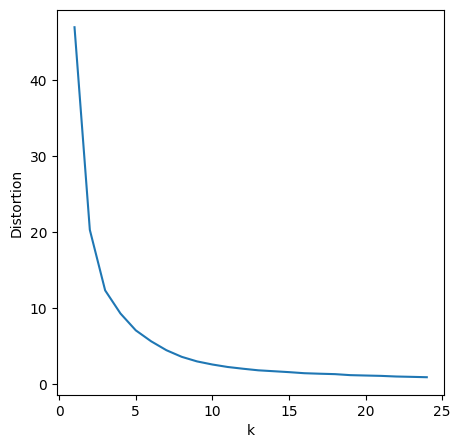

In [51]:
# use longitude and latitude to check location that are more frequently involve in road traffic accidents.
cardinals = ['longitude', 'latitude']
locations = df_2020_region[cardinals]

# Kmeans to form cluster
clusters = range(1, 25)
xy= list()

for i in clusters:
    km = KMeans(n_clusters=i, random_state= 42)
    km.fit(locations)
    x = km.inertia_
    xy.append(x)
    
plt.figure(figsize=(5,5))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.plot(clusters, xy)

### Performing KMeans Clustering 

In [52]:
km = KMeans(n_clusters=5)
km.fit(locations)
labels = km.fit_predict(locations)
centroids = km.cluster_centers_

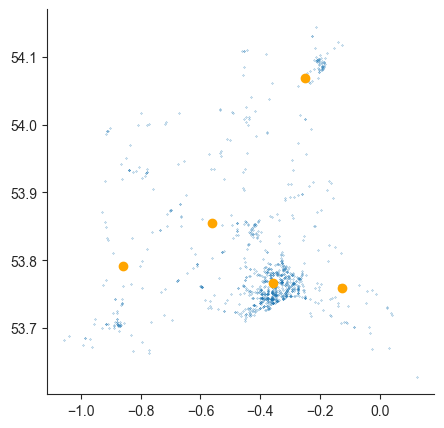

In [53]:
# Set background style 
sns.set_style('ticks')

fig = plt.figure(figsize=(5,5))
plt.scatter(locations['longitude'], locations['latitude'], s=0.05)

plt.scatter(centroids[:,0], centroids[:,1], color='orange')
sns.despine()

# Show the plot
plt.show()

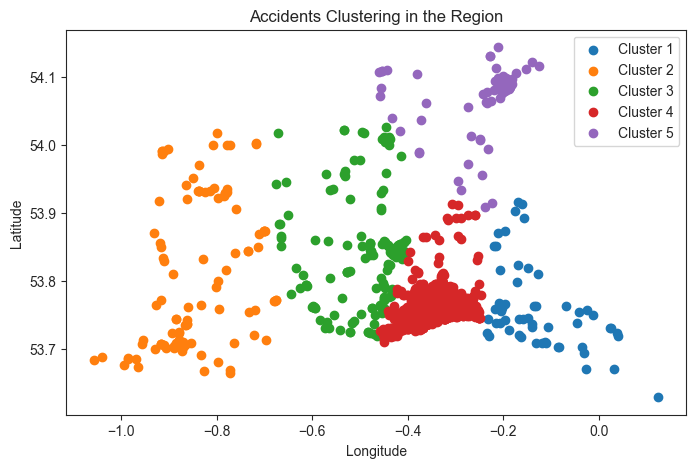

In [54]:
# Filtered accident data for the specified region 

data = df_2020_region[['longitude', 'latitude']]

# Perform k-means clustering with the desired number of clusters (5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(8, 5))
for cluster_label in range(n_clusters):
    plt.scatter(
        data[data['cluster'] == cluster_label]['longitude'],
        data[data['cluster'] == cluster_label]['latitude'],
        label=f'Cluster {cluster_label + 1}',
    )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Clustering in the Region')
plt.legend()
plt.show()

### Geographical Clustering using Folium 

In [55]:
# Perform k-means clustering with the desired number of clusters (5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_2020_region['cluster'] = kmeans.fit_predict(df_2020_region[['longitude', 'latitude']])

# Create a map centered on the mean latitude and longitude of the accidents
accident_map = folium.Map(location=[df_2020_region['latitude'].mean(), df_2020_region['longitude'].mean()], 
                          zoom_start=10, width=900, height=400)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(accident_map)

# Add markers for each accident based on clustering results
for _, row in df_2020_region.iterrows():
    cluster_label = row['cluster']
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f'Cluster: {cluster_label + 1}').add_to(marker_cluster)

# Display the map
accident_map

## Outlier Detection 

### Isolation Forests Method on Accident Table

In [145]:
# Select numerical columns
numerical_columns = df_2020_cleaned.select_dtypes(include=['float64', 'int64'])

# Create a new DataFrame with numerical columns
df_numerical = df_2020_cleaned[numerical_columns.columns]

In [146]:
from sklearn.ensemble import IsolationForest

In [147]:
# Create Isolation Forest object
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit Isolation Forest to the numerical data
isolation_forest.fit(df_numerical)


IsolationForest(contamination=0.01, random_state=42)

In [148]:
# Predict outliers using Isolation Forest
outlier_predictions = isolation_forest.predict(df_numerical)

In [149]:
# Count the number of outliers (-1) and normal data (1)
num_outliers = len(outlier_predictions[outlier_predictions == -1])
num_normal = len(outlier_predictions[outlier_predictions == 1])

print("Number of outliers:", num_outliers)
print("Number of normal data points:", num_normal)


Number of outliers: 912
Number of normal data points: 90286


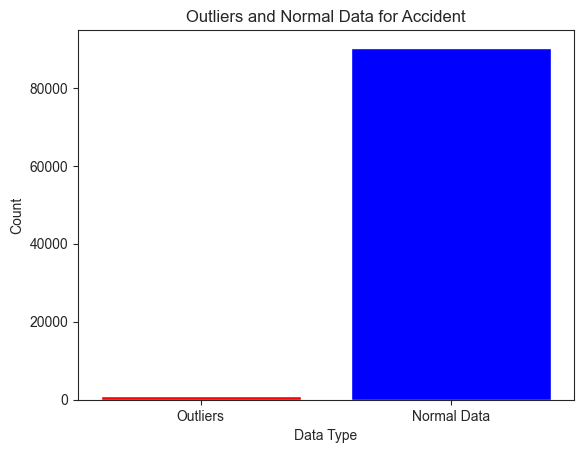

In [150]:
# Data for plotting
categories = ['Outliers', 'Normal Data']
counts = [num_outliers, num_normal]

# Create a bar plot
plt.bar(categories, counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.title('Outliers and Normal Data for Accident')

# Show the plot
plt.show()


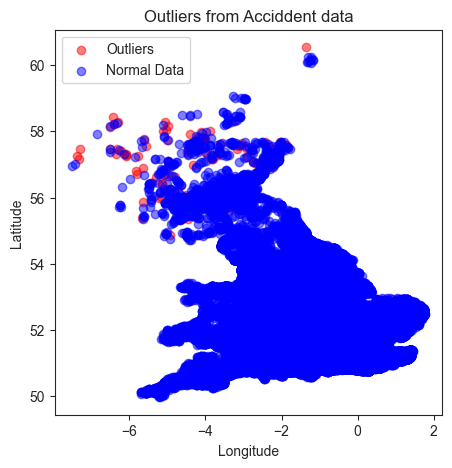

In [151]:
# Separate data points into outliers and normal data
outlier_indices = df_numerical.index[outlier_predictions == -1]
normal_indices = df_numerical.index[outlier_predictions == 1]

# Create scatter plots for longitude and latitude
plt.figure(figsize=(5, 5))

# Plot outliers
plt.scatter(df_numerical.loc[outlier_indices, 'longitude'], df_numerical.loc[outlier_indices, 'latitude'], color='red', label='Outliers', alpha=0.5)

# Plot normal data
plt.scatter(df_numerical.loc[normal_indices, 'longitude'], df_numerical.loc[normal_indices, 'latitude'], color='blue', label='Normal Data', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Outliers from Acciddent data')
plt.legend()
plt.show()


### Isolation Forest on Vehicle Table

In [152]:
# Select numerical columns
vehicle_numerical_columns = df2_2020.select_dtypes(include=['float64', 'int64'])

# Create a new DataFrame with numerical columns
df_numerical_vehicle = df2_2020[vehicle_numerical_columns.columns]

In [153]:
# Create Isolation Forest object
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit Isolation Forest to the numerical data
isolation_forest.fit(df_numerical_vehicle)


IsolationForest(contamination=0.01, random_state=42)

In [154]:
# Predict outliers using Isolation Forest
outlier_predictions = isolation_forest.predict(df_numerical_vehicle)

In [155]:
# Count the number of outliers (-1) and normal data (1)
num_outliers = len(outlier_predictions[outlier_predictions == -1])
num_normal = len(outlier_predictions[outlier_predictions == 1])

print("Number of outliers:", num_outliers)
print("Number of normal data points:", num_normal)


Number of outliers: 1673
Number of normal data points: 165702


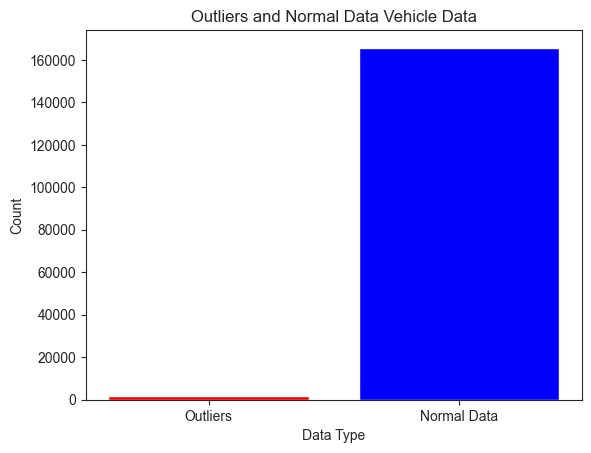

In [157]:
# Data for plotting
categories = ['Outliers', 'Normal Data']
counts = [num_outliers, num_normal]

# Create a bar plot
plt.bar(categories, counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.title('Outliers and Normal Data Vehicle Data')

# Show the plot
plt.show()


### Isolation Forest on Casualty Table

In [158]:
# Select numerical columns
casualty_numerical_columns = df3_2020.select_dtypes(include=['float64', 'int64'])

# Create a new DataFrame with numerical columns
df_numerical_casualty = df3_2020[casualty_numerical_columns.columns]

In [159]:
# Create Isolation Forest object
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit Isolation Forest to the numerical data
isolation_forest.fit(df_numerical_casualty)

IsolationForest(contamination=0.01, random_state=42)

In [160]:
# Predict outliers using Isolation Forest
outlier_predictions = isolation_forest.predict(df_numerical_casualty)

In [161]:
# Count the number of outliers (-1) and normal data (1)
num_outliers = len(outlier_predictions[outlier_predictions == -1])
num_normal = len(outlier_predictions[outlier_predictions == 1])

print("Number of outliers:", num_outliers)
print("Number of normal data points:", num_normal)


Number of outliers: 1156
Number of normal data points: 114428


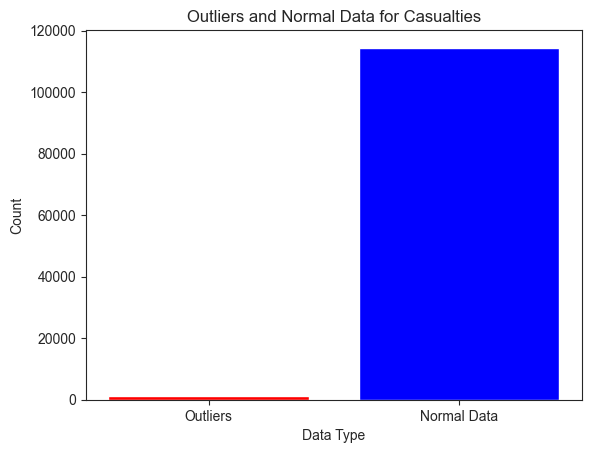

In [162]:
# Data for plotting
categories = ['Outliers', 'Normal Data']
counts = [num_outliers, num_normal]

# Create a bar plot
plt.bar(categories, counts, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.title('Outliers and Normal Data for Casualties')

# Show the plot
plt.show()


## Classification Models to Predict Fatal Injuries 

### Balancing Data for Modeling 

In [73]:
labels = (df_2020_cleaned['accident_severity'] == 1)  # 1 represents fatal accidents

# Save the labels to a variable
fatal_labels = labels
fatal_labels

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Name: accident_severity, Length: 91198, dtype: bool

In [74]:
# Count the number of True (fatal accidents) and False (non-fatal accidents) in the 'fatal_labels' Series
fatal_count = fatal_labels.value_counts()[True]
non_fatal_count = fatal_labels.value_counts()[False]

print("Number of fatal accidents:", fatal_count)
print("Number of non-fatal accidents:", non_fatal_count)


Number of fatal accidents: 1390
Number of non-fatal accidents: 89808


In [75]:
from imblearn.under_sampling import RandomUnderSampler

In [76]:
# Resample the data to create a balanced dataset
balanced_features, balanced_labels = RandomUnderSampler().fit_resample(df_2020_cleaned, fatal_labels)

In [77]:
# Count the number of True (fatal accidents) and False (non-fatal accidents) in the balanced dataset
balanced_fatal_count = sum(balanced_labels)
balanced_non_fatal_count = len(balanced_labels) - balanced_fatal_count

print("Number of fatal accidents in the balanced dataset:", balanced_fatal_count)
print("Number of non-fatal accidents in the balanced dataset:", balanced_non_fatal_count)

Number of fatal accidents in the balanced dataset: 1390
Number of non-fatal accidents in the balanced dataset: 1390


In [78]:
# Remove the 'accident_severity' column from the data frame
balanced_features = balanced_features.drop(columns=['accident_severity'])

In [79]:
# Remove the 'did_police_officer_attend_scene_of_accident' column from the data frame
balanced_features = balanced_features.drop(columns=['did_police_officer_attend_scene_of_accident'])

In [80]:
# Keep only the columns that are numeric
balanced_features = balanced_features.select_dtypes([np.number])

### Feature Engineering 

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

In [82]:
selector = SelectKBest(f_classif, k=15)
selector.fit(balanced_features, balanced_labels)

SelectKBest(k=15)

In [83]:
mask = selector.get_support()
names = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'location_easting_osgr'),
  Text(1, 0, 'location_northing_osgr'),
  Text(2, 0, 'longitude'),
  Text(3, 0, 'latitude'),
  Text(4, 0, 'police_force'),
  Text(5, 0, 'number_of_casualties'),
  Text(6, 0, 'local_authority_district'),
  Text(7, 0, 'first_road_class'),
  Text(8, 0, 'speed_limit'),
  Text(9, 0, 'junction_detail'),
  Text(10, 0, 'junction_control'),
  Text(11, 0, 'second_road_class'),
  Text(12, 0, 'light_conditions'),
  Text(13, 0, 'urban_or_rural_area'),
  Text(14, 0, 'trunk_road_flag')])

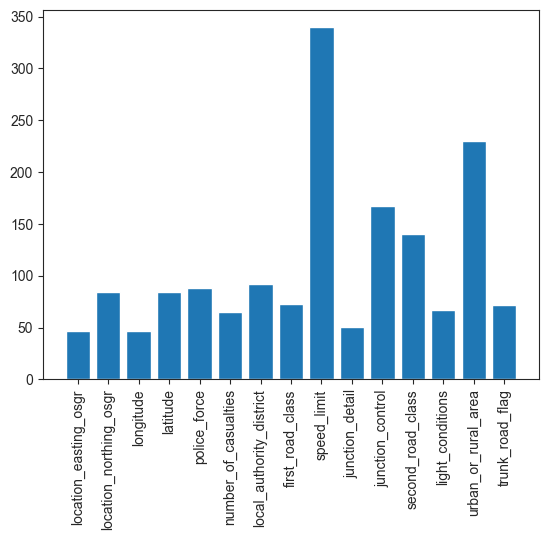

In [84]:
plt.bar(names, scores)
plt.xticks(rotation = "vertical")

### Decision Tree Classifier on Accident Table Data

In [85]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [86]:
# Split the data into features and labels
X = balanced_features
y = balanced_labels

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf = 100)

In [88]:
results_tree = cross_validate(tree, X_train, y_train, cv=10, scoring= "accuracy", return_estimator= True)

In [89]:
# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through the trained estimators and make predictions
for estimator in results_tree['estimator']:
    y_pred = estimator.predict(X_train)
    true_labels.extend(y_train)
    predicted_labels.extend(y_pred)

# Calculate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Non-Fatal", "Fatal"])
print(report)

              precision    recall  f1-score   support

   Non-Fatal       0.71      0.67      0.69     11180
       Fatal       0.68      0.72      0.70     11060

    accuracy                           0.69     22240
   macro avg       0.70      0.70      0.69     22240
weighted avg       0.70      0.69      0.69     22240



In [90]:
# Confusion Matrix
matrix = confusion_matrix(true_labels, predicted_labels)
matrix

array([[7457, 3723],
       [3063, 7997]], dtype=int64)

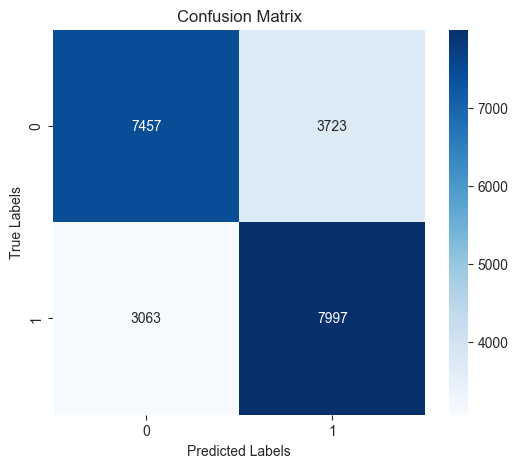

In [91]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

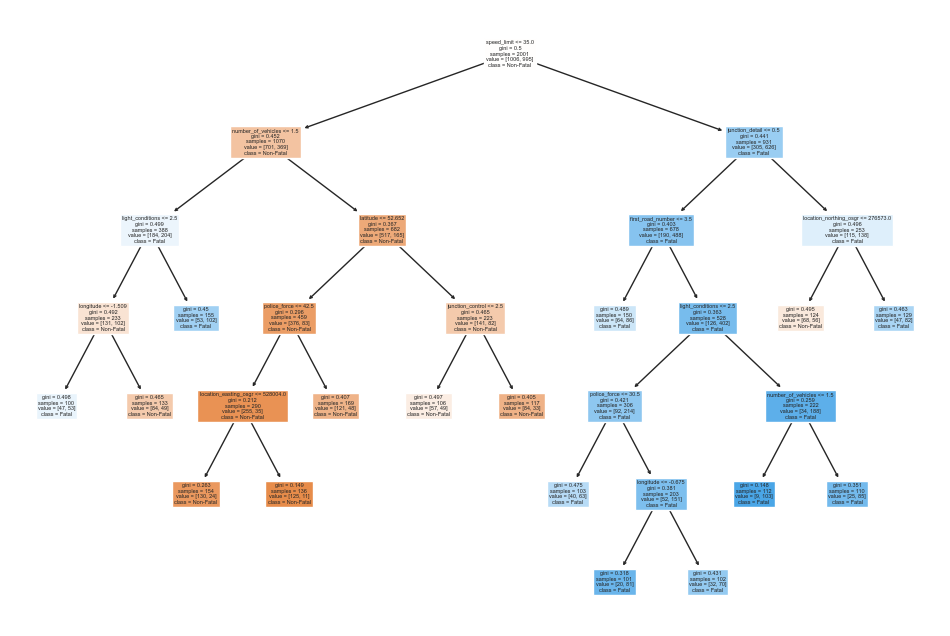

In [92]:
from sklearn.tree import plot_tree

# Get the fitted decision tree model from the cross-validation results
fitted_tree = results_tree['estimator'][0]  # Assuming you are using 1 decision tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(fitted_tree, filled=True, feature_names=X_train.columns, class_names=["Non-Fatal", "Fatal"])
plt.show()


## Decision Tree Classifier on Merged Data

In [93]:
# Merge data from Accident, Vehicle and and Casualty tables
vehicle_casualty_merged = pd.merge(df2_2020, df3_2020, on=['accident_index', 'vehicle_reference'], how='inner')
merged_dataframe = pd.merge(df_2020_cleaned, vehicle_casualty_merged, on=['accident_index'], how='inner')
len(merged_dataframe) == len(df3_2020)

False

### Data Balancing

In [94]:
labels = (merged_dataframe['accident_severity'] == 1)  # 1 represents fatal accidents

# Save the labels to a variable
fatal_labels = labels
fatal_labels

0         False
1         False
2         False
3         False
4         False
          ...  
115578    False
115579    False
115580    False
115581    False
115582    False
Name: accident_severity, Length: 115583, dtype: bool

In [95]:
# Count the number of True (fatal accidents) and False (non-fatal accidents) in the 'fatal_labels' Series
fatal_count = fatal_labels.value_counts()[True]
non_fatal_count = fatal_labels.value_counts()[False]

print("Number of fatal accidents:", fatal_count)
print("Number of non-fatal accidents:", non_fatal_count)


Number of fatal accidents: 2174
Number of non-fatal accidents: 113409


In [96]:
# Resample the data to create a balanced dataset
balanced_features, balanced_labels = RandomUnderSampler().fit_resample(merged_dataframe, fatal_labels)

In [97]:
# Count the number of True (fatal accidents) and False (non-fatal accidents) in the balanced dataset
balanced_fatal_count = sum(balanced_labels)
balanced_non_fatal_count = len(balanced_labels) - balanced_fatal_count

print("Number of fatal accidents in the balanced dataset:", balanced_fatal_count)
print("Number of non-fatal accidents in the balanced dataset:", balanced_non_fatal_count)

Number of fatal accidents in the balanced dataset: 2174
Number of non-fatal accidents in the balanced dataset: 2174


In [98]:
# Remove the 'accident_severity' column from the data frame
balanced_features = balanced_features.drop(columns=['accident_severity'])

In [99]:
# Remove the 'did_police_officer_attend_scene_of_accident' column from the data frame
balanced_features = balanced_features.drop(columns=['did_police_officer_attend_scene_of_accident'])

In [100]:
# Keep only the columns that are numeric
balanced_features = balanced_features.select_dtypes([np.number])

### Feature Engineering

In [101]:
selector = SelectKBest(f_classif, k=15)
selector.fit(balanced_features, balanced_labels)

SelectKBest(k=15)

In [102]:
mask = selector.get_support()
names = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'police_force'),
  Text(1, 0, 'number_of_casualties'),
  Text(2, 0, 'local_authority_district'),
  Text(3, 0, 'speed_limit'),
  Text(4, 0, 'junction_control'),
  Text(5, 0, 'second_road_class'),
  Text(6, 0, 'urban_or_rural_area'),
  Text(7, 0, 'vehicle_index'),
  Text(8, 0, 'vehicle_location_restricted_lane'),
  Text(9, 0, 'junction_location'),
  Text(10, 0, 'hit_object_in_carriageway'),
  Text(11, 0, 'casualty_index'),
  Text(12, 0, 'age_of_casualty'),
  Text(13, 0, 'age_band_of_casualty'),
  Text(14, 0, 'casualty_severity')])

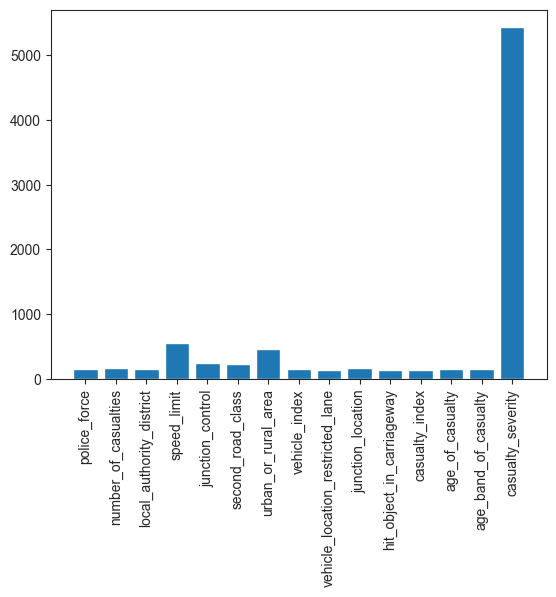

In [103]:
plt.bar(names, scores)
plt.xticks(rotation = "vertical")

### Decision Tree Classifier 

In [104]:
# Split the data into features and labels
X = balanced_features
y = balanced_labels

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf = 100)

In [106]:
results_tree = cross_validate(tree, X_train, y_train, cv=10, scoring= "accuracy", return_estimator= True)

In [107]:
# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through the trained estimators and make predictions
for estimator in results_tree['estimator']:
    y_pred = estimator.predict(X_train)
    true_labels.extend(y_train)
    predicted_labels.extend(y_pred)

# Calculate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=["Non-Fatal", "Fatal"])
print(report)

              precision    recall  f1-score   support

   Non-Fatal       0.93      0.88      0.90     17150
       Fatal       0.89      0.93      0.91     17630

    accuracy                           0.91     34780
   macro avg       0.91      0.91      0.91     34780
weighted avg       0.91      0.91      0.91     34780



In [108]:
# Confusion Matrix
matrix = confusion_matrix(true_labels, predicted_labels)
matrix

array([[15161,  1989],
       [ 1208, 16422]], dtype=int64)

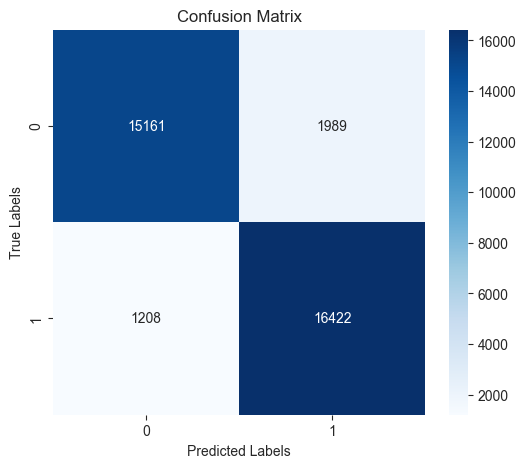

In [109]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

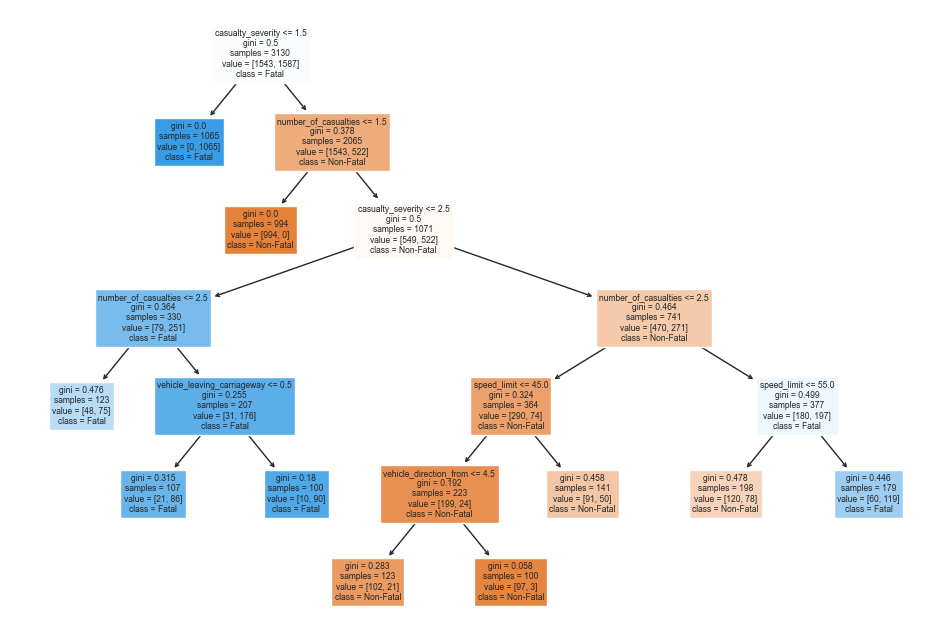

In [110]:
# Get the fitted decision tree model from the cross-validation results
fitted_tree = results_tree['estimator'][0]  # Assuming you are using 1 decision tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(fitted_tree, filled=True, feature_names=X_train.columns, class_names=["Non-Fatal", "Fatal"])
plt.show()
